In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"arquivo/hot-100-current.csv")

In [ ]:
df

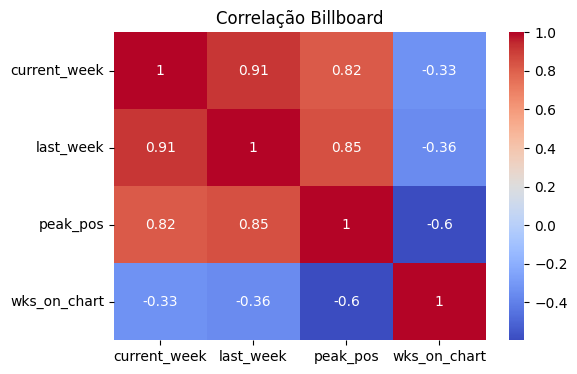

In [13]:
cols = ["current_week", "last_week", "peak_pos", "wks_on_chart"]

corr = df[cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlação Billboard")
plt.show()

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 343600 entries, 0 to 343599
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   chart_week    343600 non-null  str    
 1   current_week  343600 non-null  int64  
 2   title         343600 non-null  str    
 3   performer     343600 non-null  str    
 4   last_week     311140 non-null  float64
 5   peak_pos      343600 non-null  int64  
 6   wks_on_chart  343600 non-null  int64  
dtypes: float64(1), int64(3), str(3)
memory usage: 18.4 MB


In [15]:
df.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,50
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,2.0,2,44
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,4.0,3,41
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,5.0,4,25
4,2022-01-01,5,Easy On Me,Adele,3.0,1,11


In [ ]:
df.isnull().sum()


chart_week          0
current_week        0
title               0
performer           0
last_week       32460
peak_pos            0
wks_on_chart        0
dtype: int64

In [17]:
df.duplicated().sum()


np.int64(0)

In [18]:
df.describe()


,current_week,last_week,peak_pos,wks_on_chart
count,343600.000000,311140.000000,343600.000000,343600.000000
mean,50.500000,47.230713,40.623277,9.308364
std,28.866033,28.202632,29.327475,7.904214
min,1.000000,0.000000,1.000000,1.000000
25%,26.000000,23.000000,13.000000,4.000000
50%,51.000000,46.000000,38.000000,7.000000
75%,75.000000,71.000000,65.000000,13.000000
max,100.000000,100.000000,100.000000,91.000000


In [21]:
top_100 = df ["performer"].value_counts()
artistas_top_100 = top_100[top_100 > 20]

top_10 = df [df["peak_pos"] <=10]
artistas_top_10 = top_10 ["performer"].value_counts()

top_1 = df[df["peak_pos"] ==1]
artistas_top_1 = top_1["performer"].value_counts()

print("TOP 1")
display(artistas_top_1.head(20))

print("TOP 10")
display(artistas_top_10.head(20))

print("TOP 100")
display(artistas_top_100.head(20))


TOP 1


performer
Mariah Carey           314
Taylor Swift           282
The Beatles            170
The Weeknd             161
Adele                  158
Madonna                158
Whitney Houston        156
Bruno Mars             148
Katy Perry             144
Michael Jackson        136
Rihanna                125
Bee Gees               120
Drake                  118
Ariana Grande          115
Olivia Rodrigo         114
Boyz II Men            103
The Black Eyed Peas    100
Ed Sheeran             100
Janet Jackson           96
Justin Timberlake       96
Name: count, dtype: int64

TOP 10


performer
Taylor Swift           827
Madonna                520
Mariah Carey           461
Drake                  381
The Beatles            327
Ed Sheeran             323
Whitney Houston        322
Michael Jackson        318
Rihanna                310
Morgan Wallen          303
Janet Jackson          293
Elton John             285
Bruno Mars             281
Maroon 5               278
The Weeknd             274
P!nk                   270
Kelly Clarkson         265
Katy Perry             261
Stevie Wonder          256
The Black Eyed Peas    252
Name: count, dtype: int64

TOP 100


performer
Taylor Swift          1551
Drake                  924
Elton John             889
Madonna                857
Kenny Chesney          780
Tim McGraw             749
Morgan Wallen          702
Keith Urban            674
Stevie Wonder          659
Rod Stewart            657
Mariah Carey           642
Jason Aldean           620
Michael Jackson        614
Chicago                607
Beyonce                605
Rascal Flatts          604
Billy Joel             589
Rihanna                587
The Beatles            587
The Rolling Stones     585
Name: count, dtype: int64

In [ ]:
top100 = (
    df.drop_duplicates(["performer", "title"]) #exclui duplicados
    .groupby("performer") #agrupei os artistas
    .size()
    .sort_values(ascending=False) #do maior para o menor, ao contrério só trocar por true
    .head(20)
)

top100

performer
Taylor Swift                          235
Glee Cast                             183
Drake                                 145
YoungBoy Never Broke Again             80
The Beatles                            66
Beyonce                                64
Aretha Franklin                        64
Elton John                             58
Rod Wave                               57
The Rolling Stones                     57
Kanye West                             56
The Weeknd                             54
The Beach Boys                         54
Lil Uzi Vert                           54
Stevie Wonder                          54
Elvis Presley With The Jordanaires     53
Connie Francis                         53
Madonna                                53
Morgan Wallen                          53
Future                                 53
dtype: int64

In [23]:
top10 = (
    df [df["peak_pos"]<=10]
    .drop_duplicates(["performer", "title"])
    .groupby("performer") 
    .size()
    .sort_values(ascending=False) 
    .head(20)
)

top10

performer
Taylor Swift                          52
Madonna                               36
The Beatles                           34
Drake                                 27
Stevie Wonder                         25
Michael Jackson                       24
The Rolling Stones                    23
Elton John                            23
Mariah Carey                          22
Whitney Houston                       21
Chicago                               20
Janet Jackson                         19
Aretha Franklin                       16
Daryl Hall John Oates                 16
Rihanna                               15
Bee Gees                              15
The Beach Boys                        15
Connie Francis                        15
Elvis Presley With The Jordanaires    15
The Supremes                          14
dtype: int64

In [24]:
top1 = (
    df [df["peak_pos"]==1]
    .drop_duplicates(["performer", "title"])
    .groupby("performer") 
    .size()
    .sort_values(ascending=False) 
    .head(20)
)

top1

performer
The Beatles                           19
Mariah Carey                          16
Madonna                               12
Whitney Houston                       11
Michael Jackson                       11
The Supremes                          10
Taylor Swift                          10
Bee Gees                               9
The Rolling Stones                     8
Stevie Wonder                          7
Janet Jackson                          7
Rihanna                                6
Katy Perry                             6
Phil Collins                           6
Daryl Hall John Oates                  6
Elvis Presley With The Jordanaires     6
Usher                                  5
Drake                                  5
Paula Abdul                            5
Elton John                             5
dtype: int64

<!--
Aqui temos uma questão que exclui duplicatas, a Mariah tem recorrência de sua música "All I Want For Christmas Is You" que entra 
quase todos os natais no nº1 das paradas, totalizando 19 entradas, não 16, irei mostrar a baixo como solucionar essa questão
-->


In [ ]:
df["chart_week"] = pd.to_datetime(df["chart_week"]) #aqui é para ordenar o texto por datas

df = df.sort_values(["performer","title","chart_week"]) #cria linha do tempo da música

entries_top1 = df[
    (df["current_week"] == 1) &# filtra semanas que a musica esta em n1
    (df.groupby(["performer","title"])["current_week"].shift() != 1)# compara com a semana anterior da mesma música
] 

ranking = entries_top1["performer"].value_counts() # cria o ranking por artista

ranking.head(20)


performer
Mariah Carey             22
The Beatles              21
Taylor Swift             14
Madonna                  12
Michael Jackson          11
The Supremes             11
Whitney Houston          11
Bee Gees                  9
Adele                     8
Drake                     8
The Rolling Stones        8
Ariana Grande             7
BTS                       7
Bruno Mars                7
Janet Jackson             7
Katy Perry                7
Stevie Wonder             7
The Weeknd                7
Usher                     7
Daryl Hall John Oates     6
Name: count, dtype: int64

<!--
Análise da Billboard Hot 100 por década

Nesse bloco vamos dar uma olhada em como os hits e os artistas se comportaram ao longo do tempo, década por década.  

Vamos analisar coisas como:  
  
- Qtos artistas apareceram só uma vez no Top 100 e não voltaram (os famosos “one hit wonders”).  
- Qto tempo, em média, uma música ficava no chart.  
- Qto tempo leva para uma música chegar ao #1 e quanto tempo ela permanecia lá.  
- Qtos hits estreiam no #1 X hits que escalam lentamente

O objetivo é entender de forma clara como o mercado musical mudou ao longo dos anos.
-->

In [65]:
# Separar feats/colabs para todas as músicas no Top 100
df['artist_list'] = df['performer'].apply(
    lambda p: [a.strip() for a in re.split(r'\s+&\s+|\s+ft\.?\s+|\s+featuring\s+|\s+x\s+', p, flags=re.I)]
)

df_exploded = df.explode('artist_list').rename(columns={'artist_list':'artist'})

# primeira aparição
df_unique_songs = df_exploded.drop_duplicates(subset=['artist','title'])

# Contar quantos artistas aparecem apenas uma vez no Top 100
one_hit_wonders = df_unique_songs.groupby('artist').size()
one_hit_wonders = one_hit_wonders[one_hit_wonders == 1].reset_index(name='hits')

# Associar década da primeira aparição
df_first_week = df_unique_songs.groupby('artist')['chart_week'].min().reset_index()
df_first_week['decade'] = (df_first_week['chart_week'].dt.year // 10 * 10).astype(str) + 's'

one_hit_wonders = one_hit_wonders.merge(df_first_week[['artist','decade']], on='artist')

# Contagem de One Hit Wonders por década
one_hit_by_decade = one_hit_wonders.groupby('decade').size().sort_index()
one_hit_by_decade

decade
1950s    204
1960s    899
1970s    818
1980s    607
1990s    792
2000s    575
2010s    672
2020s    458
dtype: int64

<!--
Esse dado é interessante, pois ele desmonta a dependencia de artistas por grandes coorporações, hoje um artista pode se auto promover de maneira mais simples, sem depender de pormoções em rádios, tv, lojas fisícas, alguém pode ser relevante apenas por viralizar um vídeo dançando, o que torna o "descarte" de artistas menor. 
-->

In [ ]:

df_chart = df_exploded[['artist','title','chart_week','peak_pos']].copy()

#chart_week p/ datetime
df_chart['chart_week'] = pd.to_datetime(df_chart['chart_week'])


df_chart['decade'] = (df_chart['chart_week'].dt.year // 10 * 10).astype(str) + 's'

# Pegar primeira e última semana no chart por música e artista
df_song_weeks = (
    df_chart.groupby(['artist','title','decade'])
    .agg(
        first_week=('chart_week','min'),
        last_week=('chart_week','max'),
        peak_pos=('peak_pos','min')
    )
    .reset_index()
)

#semanas no chart
df_song_weeks['weeks_on_chart'] = ((df_song_weeks['last_week'] - df_song_weeks['first_week']).dt.days // 7 + 1)

#primeira semana que cada música chegou ao #1
first_week_at_1 = (
    df_chart[df_chart['peak_pos'] == 1]
    .groupby(['artist','title'])['chart_week']
    .min()
    .reset_index()
    .rename(columns={'chart_week':'first_week_at_1'})
)

# Juntar no df_song_weeks
df_song_weeks = df_song_weeks.merge(first_week_at_1, on=['artist','title'], how='left')

# Calcular semanas até o #1 (0 se não chegou)
df_song_weeks['weeks_to_peak'] = ((df_song_weeks['first_week_at_1'] - df_song_weeks['first_week']).dt.days // 7 + 1).fillna(0)

# Média de semanas no chart e semanas até o #1 por década
chart_stats_by_decade = df_song_weeks.groupby('decade').agg(
    media_semanas_no_chart=('weeks_on_chart','mean'),
    media_semanas_ate_numero_1=('weeks_to_peak','mean')
).round(1)

chart_stats_by_decade

,media_semanas_no_chart,media_semanas_ate_numero_1
decade,,
1950s,8.2,0.2
1960s,8.1,0.6
1970s,10.2,0.1
1980s,13.2,0.5
1990s,15.0,0.1
2000s,15.4,0.6
2010s,13.4,-2.5
2020s,10.1,-3.4


<!--
Comparado aos dados anteriores é possível entender que há menos artistas dominando o chart, mas cada lançamento é mais explosivo, tanto que segundo os dados grande parte das musicas saem do absoluto zero ao primeiro lugar, havia mais diversidade de artistas por década, mas era mais difícil "estourar" e se manter.
-->